<a href="https://colab.research.google.com/github/vitormarx/Brasilian-Championship-Predictions/blob/main/Brasilian_Championship_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este é o código fonte para os resultados do artigo **Predição do resultado de jogos do Campeonato Brasileiro de Futebol com algorítmos de Aprendizagem de Máquina**. A base de dados utilizada contém informações de todos os jogos do Campeonato brasileiro desde os anos de 2000 até 2019. Esta base está presente no folder 'dataset' e também no seguinte repositório do github, de onde foi extraída originalmente: [campeonato-brasileiro-full.csv](https://github.com/adaoduque/Brasileirao_Dataset/blob/master/campeonato-brasileiro-full.csv)

In [ ]:
# importing libraries
import numpy as np
import pandas as pd

## Limpeza dos Dados

In [ ]:
# importando a base de dados original
jogos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/dataset/campeonato-brasileiro-full.csv')

In [ ]:
# verificando a dimensionalidade da base de dados original
jogos.shape

(7939, 13)

In [ ]:
# visualizando samples da base de dados
jogos.head()

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


Modificando o nome de algumas features para que possamos ficar em um contexto mais amigável

In [ ]:
#renomeando features
jogos = jogos.rename(columns={'Data':'Temporada','Clube 1': 'Mandante', 'Clube 2': 'Visitante', 'Vencedor': 'Resultado',
                     'Clube 1 Gols': 'Gols_Mandante', 'Clube 2 Gols': 'Gols_Visitante'} )
jogos.head()

,Horário,Dia,Temporada,Mandante,Visitante,Resultado,Rodada,Arena,Gols_Mandante,Gols_Visitante,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


Exclindo features categóricas que julgo inúteis aos modelos posteriores e que não servem para insights de transformações de dados

In [ ]:
# excluindo features 
jogos = jogos.drop(labels=['Horário', 'Dia', 'Estado Clube Vencedor', 'Arena'], axis=1)
jogos.head()

,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Clube 1 Estado,Clube 2 Estado
0,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,2,0,RJ,BA
1,2000-07-29,Vasco,Sport,Sport,1ª Rodada,0,2,RJ,PE
2,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,4,1,ES,SP
3,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,0,0,RJ,MG
4,2000-07-30,Juventude,Flamengo,-,1ª Rodada,1,1,RS,RJ


É importante que para as futuras predições, o target esteja como valores inteiros. Para isso, é verificado que o objetivo do projeto encontra-se em prever a categoria correta do campo 'Resultado'. Assim, atribuo os seguintes valores aos resultados:
* Time Mandante vence = 1
* Time Visitante vence = 2
* Empate = 0

In [ ]:
# atribuindo os valores [0,1,2] aos respectivos resultados
regras_resultado = [(jogos['Gols_Mandante'] > jogos['Gols_Visitante']),
               (jogos['Gols_Mandante'] == jogos['Gols_Visitante']),
               (jogos['Gols_Mandante'] < jogos['Gols_Visitante'])]

valores_resultado = [1, 0, 2]

jogos['Resultado'] = np.select(regras_resultado, valores_resultado)
jogos.head()

,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Clube 1 Estado,Clube 2 Estado
0,2000-07-29,Fluminense,Bahia,1,1ª Rodada,2,0,RJ,BA
1,2000-07-29,Vasco,Sport,2,1ª Rodada,0,2,RJ,PE
2,2000-07-29,Vitória,Palmeiras,1,1ª Rodada,4,1,ES,SP
3,2000-07-30,Botafogo-RJ,Atlético-MG,0,1ª Rodada,0,0,RJ,MG
4,2000-07-30,Juventude,Flamengo,0,1ª Rodada,1,1,RS,RJ


# Transformando os Dados

Nesta seção, procuro ter ideias para criar outras features baseadas nas informações que já tenho do dataset original. Com um conhecimento de prática esportiva, sei que a rivalidade entre times pode ser um fator decisivo em uma partida, portanto, se um jogo for um clássico ele tende a ser mais assirrado independente da situação dos times. 

No Brasil, Há muitos clássicos históricos entre times de diferentes regiões. Porém, pensando em rivalidade, considero clássicos apenas estaduais. Portanto, se os times que se enfrentarem pertencerem ao mesmo estado, o jogo é considerado um clássico.



In [ ]:
# Clássico Estadual
classico_estadual = [(jogos['Clube 1 Estado'] == jogos['Clube 2 Estado']),
                   (jogos['Clube 1 Estado'] != jogos['Clube 2 Estado'])]
valores_estadual = [1, 0]

jogos['Classico'] = np.select(classico_estadual, valores_estadual)

# descartando as variáveis do estado de cada time do dataset
jogos = jogos.drop(labels=['Clube 1 Estado', 'Clube 2 Estado'], axis=1)
jogos.head(30)


,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico
0,2000-07-29,Fluminense,Bahia,1,1ª Rodada,2,0,0
1,2000-07-29,Vasco,Sport,2,1ª Rodada,0,2,0
2,2000-07-29,Vitória,Palmeiras,1,1ª Rodada,4,1,0
3,2000-07-30,Botafogo-RJ,Atlético-MG,0,1ª Rodada,0,0,0
4,2000-07-30,Juventude,Flamengo,0,1ª Rodada,1,1,0
5,2000-07-30,Guarani,Santa Cruz,0,1ª Rodada,0,0,0
6,2000-07-30,Cruzeiro,Athlético-PR,2,1ª Rodada,0,2,0
7,2000-07-30,América-MG,Gama,2,1ª Rodada,0,1,0
8,2000-07-30,Goiás,Corinthians,1,1ª Rodada,3,0,0
9,2000-08-02,Coritiba,Sport,0,2ª Rodada,0,0,0


In [ ]:
# visualizando os tipos de dados presentes no dataset
jogos.dtypes

Temporada         object
Mandante          object
Visitante         object
Resultado          int64
Rodada            object
Gols_Mandante      int64
Gols_Visitante     int64
Classico           int64
dtype: object

In [ ]:
# Corrigindo tipagem dos dados de temporada
jogos['Temporada'] = pd.to_datetime(jogos['Temporada'])
jogos.dtypes

Temporada         datetime64[ns]
Mandante                  object
Visitante                 object
Resultado                  int64
Rodada                    object
Gols_Mandante              int64
Gols_Visitante             int64
Classico                   int64
dtype: object

Muitos Padrões mudam a cada temporada, clubes perdem jogadores, compram jogadores, mudam de treinadores e dirigentes. Com certeza isso afeta muito o desempenho do time nas temporadas e é por isso que é difícil ter um time que vença uma competição por vários anos seguidos. Pensando nisso reduzo a base de dados para jogos apenas entre as temporadas de 2012 a 2019.

In [ ]:
# reduzindo base de dados para jogos das tempodas 2012 a 2019
jogos = jogos[jogos['Temporada'].dt.year >= 2012]
jogos.reset_index(drop=True, inplace = True)

jogos['Temporada'] = jogos['Temporada'].dt.year

jogos.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico
0,2012,Sport,Flamengo,0,1ª Rodada,1,1,0
1,2012,Palmeiras,Portuguesa,0,1ª Rodada,1,1,1
2,2012,Figueirense,Náutico,1,1ª Rodada,2,1,0
3,2012,Cruzeiro,Atlético-GO,0,1ª Rodada,0,0,0
4,2012,Bahia,Santos,0,1ª Rodada,0,0,0
5,2012,Ponte Preta,Atlético-MG,2,1ª Rodada,0,1,0
6,2012,Botafogo-RJ,São Paulo,1,1ª Rodada,4,2,0
7,2012,Corinthians,Fluminense,2,1ª Rodada,0,1,0
8,2012,Internacional,Coritiba,1,1ª Rodada,2,0,0
9,2012,Vasco,Grêmio,1,1ª Rodada,2,1,0


In [ ]:
# mudando o nome atribuído a cada rodada
jogos['Rodada'] = [int(x.split('ª')[0]) for x in jogos['Rodada'].values]
jogos.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico
0,2012,Sport,Flamengo,0,1,1,1,0
1,2012,Palmeiras,Portuguesa,0,1,1,1,1
2,2012,Figueirense,Náutico,1,1,2,1,0
3,2012,Cruzeiro,Atlético-GO,0,1,0,0,0
4,2012,Bahia,Santos,0,1,0,0,0


Baseado nas informações já presentes no dataset, é possível tirar informações para criar novas features. As primeiras features serão o número de vitórias, derrotas e empates de cada time na temporada atualizando a cada rodada, ou seja, todo o cálculo é baseado nas rodadas anteriores daquela temporada, o time chegará em uma rodada com os dados calculados das rodadas anteriores àquela.

EXEMPLO: na rodada 1 o Corinthans ganhou, na rodada 2 o Corinthians empatou, portanto, ele chega ao jogo da rodada 3 com (1 vitória, 1 empate e 0 derrotas) e assim sucessivamente

obs.: a primeira rodada da temporada sempre será zerada nesta feature

In [ ]:
# calculando número de vitórias, derrotas e empates na temporada
temporadas = jogos['Temporada'].value_counts().index.sort_values().values

jogos['Vitorias_Mandante'] = jogos['Mandante']
jogos['Vitorias_Visitante'] = jogos['Mandante']

jogos['Derrotas_Mandante'] = jogos['Mandante']
jogos['Derrotas_Visitante'] = jogos['Mandante']

jogos['Empates_Mandante'] = jogos['Mandante']
jogos['Empates_Visitante'] = jogos['Mandante']

for temporada in  temporadas:
    dft = jogos[jogos['Temporada'] == temporada]
    
    for index, row in dft.iterrows():
        df_mandante = dft[(dft['Rodada'] < row['Rodada']) & (dft['Mandante'] == row['Mandante'])]
        c1_vitorias = 0
        c1_derrotas = 0
        c1_empates = 0
        for index2, row2 in df_mandante.iterrows():
            if row2['Resultado'] == 0:
                c1_empates+=1
            elif row2['Resultado'] == 1:
                c1_vitorias+=1
            elif row2['Resultado'] == 2:
                c1_derrotas+=1

        df_visitante = dft[(dft['Rodada'] < row['Rodada']) & (dft['Visitante'] == row['Mandante'])]
        for index2, row2 in df_visitante.iterrows():
            if row2['Resultado'] == 1:
                c1_derrotas+=1
            elif row2['Resultado'] == 0:
                c1_empates+=1
            elif row2['Resultado'] == 2:
                c1_vitorias+=1


        df_mandante = dft[(dft['Rodada'] < row['Rodada']) & (dft['Mandante'] == row['Visitante'])]
        c2_vitorias = 0
        c2_derrotas = 0
        c2_empates = 0
        for index2, row2 in df_mandante.iterrows():
            if row2['Resultado'] == 0:
                c2_empates+=1
            elif row2['Resultado'] == 1:
                c2_vitorias+=1
            elif row2['Resultado'] == 2:
                c2_derrotas+=1

        df_visitante = dft[(dft['Rodada'] < row['Rodada']) & (dft['Visitante'] == row['Visitante'])]
        for index2, row2 in df_visitante.iterrows():
            if row2['Resultado'] == 1:
                c2_derrotas+=1
            elif row2['Resultado'] == 0:
                c2_empates+=1
            elif row2['Resultado'] == 2:
                c2_vitorias+=1


        jogos.at[index, 'Vitorias_Mandante'] = c1_vitorias
        jogos.at[index, 'Vitorias_Visitante'] = c2_vitorias
                    
        jogos.at[index, 'Derrotas_Mandante'] = c1_derrotas
        jogos.at[index, 'Derrotas_Visitante'] = c2_derrotas
                    
        jogos.at[index, 'Empates_Mandante'] = c1_empates
        jogos.at[index, 'Empates_Visitante'] = c2_empates

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
jogos.tail()

,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico,Vitorias_Mandante,Vitorias_Visitante,Derrotas_Mandante,Derrotas_Visitante,Empates_Mandante,Empates_Visitante
3035,2019,Goiás,Grêmio,1,38,3,2,0,14,19,16,10,7,8
3036,2019,Internacional,Atlético-MG,1,38,2,1,0,15,13,13,15,9,9
3037,2019,Cruzeiro,Palmeiras,2,38,0,2,0,7,20,15,6,15,11
3038,2019,Santos,Flamengo,1,38,4,0,0,21,28,8,3,8,6
3039,2019,CSA,São Paulo,2,38,1,2,0,8,16,21,9,8,12


Outras features possíveis e mais detalhistas são o número de vitórias, derrotas e empate no mando de campo específico. Ou seja, quantos jogos o time ganhou na temporada quando jogou em casa? quando jogou fora? quantos empatou em casa? quantos empatou fora? quantos foi derrotado em casa? quantos foi derrotado fora?

Então calculamos o resultado destas perguntas, atualizando-lhes a cada rodada conforme feito anteriormente

In [ ]:
# calculando número de vitórias, empates e derrotas no mando de campo específico
def vitoria_em_casa(ser):
    wins = [0]
    
    [wins.append(wins[-1]+1) if win==1 else wins.append(wins[-1]) for win in ser.values]
    
    return wins[0:-1]

def vitoria_fora_de_casa(ser):
    wins = [0]
    
    [wins.append(wins[-1]+1) if win==2 else wins.append(wins[-1]) for win in ser.values]
    
    return wins[0:-1]

def empate(ser):
    wins = [0]
    
    [wins.append(wins[-1]+1) if win==0 else wins.append(wins[-1]) for win in ser.values]
    
    return wins[0:-1]

jogos['VC_Mandante'] = jogos.groupby(['Temporada', 'Mandante'])['Resultado'].transform(lambda x: vitoria_em_casa(x))
jogos['DC_Mandante'] = jogos.groupby(['Temporada', 'Mandante'])['Resultado'].transform(lambda x: vitoria_fora_de_casa(x))
jogos['VF_Visitante'] = jogos.groupby(['Temporada', 'Visitante'])['Resultado'].transform(lambda x: vitoria_fora_de_casa(x))
jogos['DF_Visitante'] = jogos.groupby(['Temporada', 'Visitante'])['Resultado'].transform(lambda x: vitoria_em_casa(x))
jogos['EC_Mandante'] = jogos.groupby(['Temporada', 'Mandante'])['Resultado'].transform(lambda x: empate(x)) 
jogos['EF_Visitante'] = jogos.groupby(['Temporada', 'Visitante'])['Resultado'].transform(lambda x: empate(x))

In [ ]:
jogos.tail(20)

,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico,Vitorias_Mandante,Vitorias_Visitante,Derrotas_Mandante,Derrotas_Visitante,Empates_Mandante,Empates_Visitante,VC_Mandante,DC_Mandante,VF_Visitante,DF_Visitante,EC_Mandante,EF_Visitante
3020,2019,Fluminense,Fortaleza,0,37,0,0,0,11,14,16,15,9,7,6,6,4,9,6,5
3021,2019,Athlético-PR,Santos,1,37,1,0,0,17,21,10,7,9,8,11,4,8,6,3,4
3022,2019,Atlético-MG,Botafogo-rj,1,37,2,0,0,12,13,15,20,9,3,9,7,4,12,2,2
3023,2019,Chapecoense,CSA,1,37,3,0,0,6,8,20,20,10,8,3,10,2,13,5,3
3024,2019,Ceará,Corinthians,2,37,0,1,0,10,13,18,9,8,14,8,4,3,8,6,7
3025,2019,São Paulo,Internacional,1,37,2,1,0,15,15,9,12,12,9,9,3,5,10,6,3
3026,2019,Bahia,Vasco,0,37,1,1,0,12,12,12,13,12,11,7,4,5,7,7,6
3027,2019,Flamengo,Avaí,1,37,6,1,0,27,3,3,23,6,10,16,0,2,14,2,2
3028,2019,Grêmio,Cruzeiro,1,37,2,0,0,18,7,10,14,8,15,11,4,2,9,3,7
3029,2019,Palmeiras,Goiás,1,37,5,1,0,19,14,6,15,11,7,12,2,4,10,4,4


Como temos o número de vitórias, empates e derrotas de um time na temporada. Podemos atualizar seus pontos a cada rodada, para isso segundo as regras do campeonato 
- vitória +3pts
- empate +1pt
- derrota +0pts

In [ ]:
# calculando pontuação dos times por rodada na temporada
temporadas = jogos['Temporada'].value_counts().index.sort_values().values

jogos['Pontos_Mandante'] = jogos['Mandante']
jogos['Pontos_Visitante'] = jogos['Mandante']

for temporada in  temporadas:
    dft = jogos[jogos['Temporada'] == temporada]
    
    for index, row in dft.iterrows():
        df_mandante = dft[(dft['Rodada'] < row['Rodada']) & (dft['Mandante'] == row['Mandante'])]
        c1_pontos = 0
        for index2, row2 in df_mandante.iterrows():
            if row2['Resultado'] == 0:
                c1_pontos+=1
            elif row2['Resultado'] == 1:
                c1_pontos+=3
            elif row2['Resultado'] == 2:
                c1_pontos+=0

        df_visitante = dft[(dft['Rodada'] < row['Rodada']) & (dft['Visitante'] == row['Mandante'])]
        for index2, row2 in df_visitante.iterrows():
            if row2['Resultado'] == 1:
                c1_pontos+=0
            elif row2['Resultado'] == 0:
                c1_pontos+=1
            elif row2['Resultado'] == 2:
                c1_pontos+=3


        df_mandante = dft[(dft['Rodada'] < row['Rodada']) & (dft['Mandante'] == row['Visitante'])]
        c2_pontos = 0
        for index2, row2 in df_mandante.iterrows():
            if row2['Resultado'] == 0:
                c2_pontos+=1
            elif row2['Resultado'] == 1:
                c2_pontos+=3
            elif row2['Resultado'] == 2:
                c2_pontos+=0

        df_visitante = dft[(dft['Rodada'] < row['Rodada']) & (dft['Visitante'] == row['Visitante'])]
        for index2, row2 in df_visitante.iterrows():
            if row2['Resultado'] == 1:
                c2_pontos+=0
            elif row2['Resultado'] == 0:
                c2_pontos+=1
            elif row2['Resultado'] == 2:
                c2_pontos+=3


        jogos.at[index, 'Pontos_Mandante'] = c1_pontos
        jogos.at[index, 'Pontos_Visitante'] = c2_pontos
                    
        

In [ ]:
jogos.tail()

,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico,Vitorias_Mandante,Vitorias_Visitante,...,Empates_Mandante,Empates_Visitante,VC_Mandante,DC_Mandante,VF_Visitante,DF_Visitante,EC_Mandante,EF_Visitante,Pontos_Mandante,Pontos_Visitante
3035,2019,Goiás,Grêmio,1,38,3,2,0,14,19,...,7,8,10,5,7,6,3,5,49,65
3036,2019,Internacional,Atlético-MG,1,38,2,1,0,15,13,...,9,9,10,2,3,8,6,7,54,48
3037,2019,Cruzeiro,Palmeiras,2,38,0,2,0,7,20,...,15,11,5,5,7,4,8,7,36,71
3038,2019,Santos,Flamengo,1,38,4,0,0,21,28,...,8,6,13,1,11,3,4,4,71,90
3039,2019,CSA,São Paulo,2,38,1,2,0,8,16,...,8,12,6,7,6,6,5,6,32,60


Com as informações anteriores, é possível calcular o aproveitamento geral do time a cada rodada, dividindo o número de pontos que o time tem pelo número de pontos possíveis até a rodada jogada

In [ ]:
# calculando aproveitamento dos times por rodada na temporada
jogos['Pontos_Possiveis'] = jogos['Rodada'] * 3

jogos['Aprov_Mandante'] = jogos['Pontos_Mandante'] / jogos['Pontos_Possiveis']
jogos['Aprov_Visitante'] = jogos['Pontos_Visitante'] / jogos['Pontos_Possiveis']

# excluindo feature auxiliar apenas para cálculo
jogos = jogos.drop(labels=['Pontos_Possiveis'], axis=1)

jogos.tail()

,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico,Vitorias_Mandante,Vitorias_Visitante,...,VC_Mandante,DC_Mandante,VF_Visitante,DF_Visitante,EC_Mandante,EF_Visitante,Pontos_Mandante,Pontos_Visitante,Aprov_Mandante,Aprov_Visitante
3035,2019,Goiás,Grêmio,1,38,3,2,0,14,19,...,10,5,7,6,3,5,49,65,0.429825,0.570175
3036,2019,Internacional,Atlético-MG,1,38,2,1,0,15,13,...,10,2,3,8,6,7,54,48,0.473684,0.421053
3037,2019,Cruzeiro,Palmeiras,2,38,0,2,0,7,20,...,5,5,7,4,8,7,36,71,0.315789,0.622807
3038,2019,Santos,Flamengo,1,38,4,0,0,21,28,...,13,1,11,3,4,4,71,90,0.622807,0.789474
3039,2019,CSA,São Paulo,2,38,1,2,0,8,16,...,6,7,6,6,5,6,32,60,0.280702,0.526316


Outra feature que ao meu ver inicial seria muito importante é o confronto direto, por se tratar de dados históricos de um mesmo campeonato, podemos ter um time levando vantagem sobre o outro em confrontos das duas equipes ao longo das temporadas. 

In [ ]:
# calculando histórico de confrontos diretos entre duas equipes
jogos['Mandante_Venceu'] = 0
jogos['Visitante_Venceu'] = 0
jogos['Equipes_Empataram'] = 0

clubs = jogos['Mandante'].value_counts().index.sort_values().values

for club1 in clubs:
    for club2 in clubs:
        dfc = jogos[((jogos['Mandante'] == club1) & (jogos['Visitante'] == club2)) | ((jogos['Visitante'] == club1) & (jogos['Mandante'] == club2))]
        mandante_venceu = 0
        visitante_venceu = 0
        equipes_empataram = 0
        for index, row in dfc.iterrows():
            jogos.at[index, 'Mandante_Venceu'] = mandante_venceu
            jogos.at[index, 'Visitante_Venceu'] = visitante_venceu
            jogos.at[index, 'Equipes_Empataram'] = equipes_empataram
            
            if row['Resultado'] == 0:
                mandante_venceu +=1
            elif row['Resultado'] == 1:
                visitante_venceu +=1
            else:
                equipes_empataram+=1
            

In [ ]:
jogos.tail()

,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico,Vitorias_Mandante,Vitorias_Visitante,...,DF_Visitante,EC_Mandante,EF_Visitante,Pontos_Mandante,Pontos_Visitante,Aprov_Mandante,Aprov_Visitante,Mandante_Venceu,Visitante_Venceu,Equipes_Empataram
3035,2019,Goiás,Grêmio,1,38,3,2,0,14,19,...,6,3,5,49,65,0.429825,0.570175,3,4,0
3036,2019,Internacional,Atlético-MG,1,38,2,1,0,15,13,...,8,6,7,54,48,0.473684,0.421053,1,8,4
3037,2019,Cruzeiro,Palmeiras,2,38,0,2,0,7,20,...,4,8,7,36,71,0.315789,0.622807,4,8,1
3038,2019,Santos,Flamengo,1,38,4,0,0,21,28,...,3,4,4,71,90,0.622807,0.789474,6,7,2
3039,2019,CSA,São Paulo,2,38,1,2,0,8,16,...,6,5,6,32,60,0.280702,0.526316,1,0,0


Agora, calculo o saldo de gols para cada time no mando de campo específico, essa feature responde perguntas como: Quantos gols o time mandante fez jogando em casa na temporada? quantos sofreu?, quantos gols o time visitante fez fora de casa? quantos sofreu?

In [ ]:
def calcular_goals(ser):
    goals = [0]
    
    [goals.append(goals[-1]+goal) for goal in ser.values]
    
    return goals[0:-1]

jogos['SG_Casa_Mandante'] = jogos.groupby(['Temporada', 'Mandante'])['Gols_Mandante'].transform(lambda x: calcular_goals(x))
jogos['GS_Casa_Mandante'] = jogos.groupby(['Temporada', 'Mandante'])['Gols_Visitante'].transform(lambda x: calcular_goals(x))

jogos['SG_Fora_Visitante'] = jogos.groupby(['Temporada', 'Visitante'])['Gols_Visitante'].transform(lambda x: calcular_goals(x))
jogos['GS_Fora_Visitante'] = jogos.groupby(['Temporada', 'Visitante'])['Gols_Mandante'].transform(lambda x: calcular_goals(x))

In [ ]:
jogos.tail()

,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico,Vitorias_Mandante,Vitorias_Visitante,...,Pontos_Visitante,Aprov_Mandante,Aprov_Visitante,Mandante_Venceu,Visitante_Venceu,Equipes_Empataram,SG_Casa_Mandante,GS_Casa_Mandante,SG_Fora_Visitante,GS_Fora_Visitante
3035,2019,Goiás,Grêmio,1,38,3,2,0,14,19,...,65,0.429825,0.570175,3,4,0,28,21,24,18
3036,2019,Internacional,Atlético-MG,1,38,2,1,0,15,13,...,48,0.473684,0.421053,1,8,4,26,14,16,24
3037,2019,Cruzeiro,Palmeiras,2,38,0,2,0,7,20,...,71,0.315789,0.622807,4,8,1,13,15,19,19
3038,2019,Santos,Flamengo,1,38,4,0,0,21,28,...,90,0.622807,0.789474,6,7,2,40,15,30,15
3039,2019,CSA,São Paulo,2,38,1,2,0,8,16,...,60,0.280702,0.526316,1,0,0,16,22,14,17


A seguir, excluo as features que informam quantos gols cada time fez na partida, pois, para a previsão não faz sentido já que assim já saberiamos o resultado do confronto.

In [ ]:
# excluindo feature de quantos gosl o time fez na partida
jogos = jogos.drop(labels=['Gols_Mandante', 'Gols_Visitante'], axis=1)

In [ ]:
# deixando o nome dos times em letras minúsculas para evitar Camel Case
jogos['Mandante'] = jogos['Mandante'].str.lower()
jogos['Visitante'] = jogos['Visitante'].str.lower()
jogos.head()

,Temporada,Mandante,Visitante,Resultado,Rodada,Classico,Vitorias_Mandante,Vitorias_Visitante,Derrotas_Mandante,Derrotas_Visitante,...,Pontos_Visitante,Aprov_Mandante,Aprov_Visitante,Mandante_Venceu,Visitante_Venceu,Equipes_Empataram,SG_Casa_Mandante,GS_Casa_Mandante,SG_Fora_Visitante,GS_Fora_Visitante
0,2012,sport,flamengo,0,1,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0
1,2012,palmeiras,portuguesa,0,1,1,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0
2,2012,figueirense,náutico,1,1,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0
3,2012,cruzeiro,atlético-go,0,1,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0
4,2012,bahia,santos,0,1,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0


In [ ]:
jogos.shape

(3040, 29)

Sites de apostas tem o sistema de odds para os jogos. As odds são números baseados em cálculos estatísticos que apontam a probabilidade de um evento ocorrer. Quanto maior a probabilidade de umm evento ocorrer, menor a odd e vice versa. Aqui, vamos integrar ao projeto uma nova base de dados contendo as odds de cada jogo nesse período segundo a casa de apostas inglesa OddsPortal

É importante salientar que o dataset de odds é encontrada no folder deste projeto em datasets e no site de estatísticas esportivas europeu [football-data.co.uk](https://www.football-data.co.uk/brazil.php), as odds são cálculos estatísticos de probabilidade e indicam tendências do resultado dos jogos

In [ ]:
odds = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/dataset/BRA.xlsx')
odds.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,2012-05-19,22:30:00,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,2012-05-19,22:30:00,Sport,Flamengo,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,2012-05-20,01:00:00,Figueirense,Náutico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,2012-05-20,20:00:00,Botafogo-RJ,São Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,2012-05-20,20:00:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [ ]:
# tratando dados do dataset odds para ter somente as features que quero
odds = odds.drop(labels=['Country','League','Season','Time','HG','AG','Res','PH','PD','PA','AvgH','AvgD','AvgA'], axis=1)
odds = odds.rename(columns={'Date':'Temporada','Home': 'Mandante', 'Away': 'Visitante'})

odds['Mandante'] = odds['Mandante'].str.lower()
odds['Visitante'] = odds['Visitante'].str.lower()

odds.shape

(3800, 6)

In [ ]:
odds = odds.rename(columns={'MaxH':'odd_Mandante','MaxD':'odd_Empate', 'MaxA':'odd_Visitante'} )

In [ ]:
odds.dtypes

Temporada        datetime64[ns]
Mandante                 object
Visitante                object
odd_Mandante            float64
odd_Empate              float64
odd_Visitante           float64
dtype: object

In [ ]:
odds = odds[odds['Temporada'].dt.year  >= 2012]
odds = odds[odds['Temporada'].dt.year  <= 2019]
odds.reset_index(drop=True, inplace = True)

odds['Temporada'] = odds['Temporada'].dt.year
odds.tail()

,Temporada,Mandante,Visitante,odd_Mandante,odd_Empate,odd_Visitante
3035,2019,fortaleza,bahia,2.12,3.74,3.90
3036,2019,goiás,grêmio,2.10,3.75,3.87
3037,2019,internacional,atlético-mg,1.64,4.30,6.00
3038,2019,santos,flamengo,2.80,3.75,2.56
3039,2019,vasco,chapecoense,1.46,4.75,8.62


Podemos ver que o novo dataset tem o mesmo número de jogos da temporada 2012 a 2019 que o dataset anterior, portanto não há jogos faltantes.

In [ ]:
# concatenando o número de rodadas ao dataset
rodadas = jogos['Rodada']
odds = pd.concat([odds, rodadas], axis=1)
odds.tail()

,Temporada,Mandante,Visitante,odd_Mandante,odd_Empate,odd_Visitante,Rodada
3035,2019,fortaleza,bahia,2.12,3.74,3.90,38
3036,2019,goiás,grêmio,2.10,3.75,3.87,38
3037,2019,internacional,atlético-mg,1.64,4.30,6.00,38
3038,2019,santos,flamengo,2.80,3.75,2.56,38
3039,2019,vasco,chapecoense,1.46,4.75,8.62,38


In [ ]:
odds.head()

,Temporada,Mandante,Visitante,odd_Mandante,odd_Empate,odd_Visitante,Rodada
0,2012,palmeiras,portuguesa,1.76,3.87,5.31,1
1,2012,sport,flamengo,2.83,3.42,2.70,1
2,2012,figueirense,náutico,1.67,4.05,7.22,1
3,2012,botafogo-rj,são paulo,2.49,3.39,3.15,1
4,2012,corinthians,fluminense,1.96,3.53,4.41,1


In [ ]:
# juntando as bases de dados
data = pd.merge(jogos,odds, on=['Temporada','Mandante','Visitante','Rodada'], how='left')
data.tail()

,Temporada,Mandante,Visitante,Resultado,Rodada,Classico,Vitorias_Mandante,Vitorias_Visitante,Derrotas_Mandante,Derrotas_Visitante,...,Mandante_Venceu,Visitante_Venceu,Equipes_Empataram,SG_Casa_Mandante,GS_Casa_Mandante,SG_Fora_Visitante,GS_Fora_Visitante,odd_Mandante,odd_Empate,odd_Visitante
3035,2019,goiás,grêmio,1,38,0,14,19,16,10,...,3,4,0,28,21,24,18,2.10,3.75,3.87
3036,2019,internacional,atlético-mg,1,38,0,15,13,13,15,...,1,8,4,26,14,16,24,1.64,4.30,6.00
3037,2019,cruzeiro,palmeiras,2,38,0,7,20,15,6,...,4,8,1,13,15,19,19,2.70,3.40,2.95
3038,2019,santos,flamengo,1,38,0,21,28,8,3,...,6,7,2,40,15,30,15,2.80,3.75,2.56
3039,2019,csa,são paulo,2,38,0,8,16,21,9,...,1,0,0,16,22,14,17,3.75,3.36,2.36


In [ ]:
data.dtypes

Temporada               int64
Mandante               object
Visitante              object
Resultado               int64
Rodada                  int64
Classico                int64
Vitorias_Mandante      object
Vitorias_Visitante     object
Derrotas_Mandante      object
Derrotas_Visitante     object
Empates_Mandante       object
Empates_Visitante      object
VC_Mandante             int64
DC_Mandante             int64
VF_Visitante            int64
DF_Visitante            int64
EC_Mandante             int64
EF_Visitante            int64
Pontos_Mandante        object
Pontos_Visitante       object
Aprov_Mandante         object
Aprov_Visitante        object
Mandante_Venceu         int64
Visitante_Venceu        int64
Equipes_Empataram       int64
SG_Casa_Mandante        int64
GS_Casa_Mandante        int64
SG_Fora_Visitante       int64
GS_Fora_Visitante       int64
odd_Mandante          float64
odd_Empate            float64
odd_Visitante         float64
dtype: object

In [ ]:
pd.isna(data).sum()

Temporada               0
Mandante                0
Visitante               0
Resultado               0
Rodada                  0
Classico                0
Vitorias_Mandante       0
Vitorias_Visitante      0
Derrotas_Mandante       0
Derrotas_Visitante      0
Empates_Mandante        0
Empates_Visitante       0
VC_Mandante             0
DC_Mandante             0
VF_Visitante            0
DF_Visitante            0
EC_Mandante             0
EF_Visitante            0
Pontos_Mandante         0
Pontos_Visitante        0
Aprov_Mandante          0
Aprov_Visitante         0
Mandante_Venceu         0
Visitante_Venceu        0
Equipes_Empataram       0
SG_Casa_Mandante        0
GS_Casa_Mandante        0
SG_Fora_Visitante       0
GS_Fora_Visitante       0
odd_Mandante          522
odd_Empate            522
odd_Visitante         522
dtype: int64

Percebe-se que algumas odds estão faltando, portanto substituo elas pela média das odds de cada coluna

In [ ]:
# substituindo valores faltantes
data['odd_Mandante'].fillna(data['odd_Mandante'].mean(), inplace=True)
data['odd_Visitante'].fillna(data['odd_Visitante'].mean(), inplace=True)
data['odd_Empate'].fillna(data['odd_Empate'].mean(), inplace=True)

In [ ]:
pd.isna(data).sum()

Temporada             0
Mandante              0
Visitante             0
Resultado             0
Rodada                0
Classico              0
Vitorias_Mandante     0
Vitorias_Visitante    0
Derrotas_Mandante     0
Derrotas_Visitante    0
Empates_Mandante      0
Empates_Visitante     0
VC_Mandante           0
DC_Mandante           0
VF_Visitante          0
DF_Visitante          0
EC_Mandante           0
EF_Visitante          0
Pontos_Mandante       0
Pontos_Visitante      0
Aprov_Mandante        0
Aprov_Visitante       0
Mandante_Venceu       0
Visitante_Venceu      0
Equipes_Empataram     0
SG_Casa_Mandante      0
GS_Casa_Mandante      0
SG_Fora_Visitante     0
GS_Fora_Visitante     0
odd_Mandante          0
odd_Empate            0
odd_Visitante         0
dtype: int64

In [ ]:
# corrigindo tipagem dos dados
data['Vitorias_Mandante'].astype(str).astype(int)
data['Vitorias_Visitante'].astype(str).astype(int)
data['Derrotas_Mandante'].astype(str).astype(int)
data['Derrotas_Visitante'].astype(str).astype(int)
data['Empates_Mandante'].astype(str).astype(int)
data['Empates_Visitante'].astype(str).astype(int)
data['Pontos_Mandante'].astype(str).astype(int)
data['Pontos_Visitante'].astype(str).astype(int)
data['Aprov_Mandante'].astype(str).astype(float)
data['Aprov_Visitante'].astype(str).astype(float)

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
3035    0.570175
3036    0.421053
3037    0.622807
3038    0.789474
3039    0.526316
Name: Aprov_Visitante, Length: 3040, dtype: float64

In [ ]:
# separando base de dados em features e target
Y = data['Resultado']
X = data.drop('Resultado', axis=1)

In [ ]:
# salvando dados pré-processados
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/dataset/jogos_BR.pkl', mode='wb') as f:
  pickle.dump([X,Y], f)

# Análise de Dados

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/dataset/jogos_BR.pkl', 'rb') as f:
  [X,Y] = pickle.load(f)

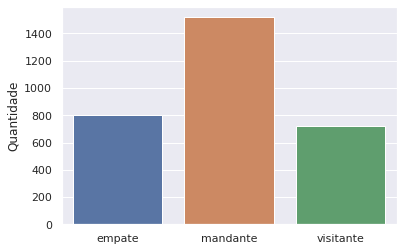

In [ ]:
# análisando quantidade de vitórias, derrotas e empate
result = ['empate', 'mandante','visitante']
sns.set_theme(style="darkgrid")
sns.countplot(x = data['Resultado'])
plt.xlabel('')
plt.ylabel('Quantidade')
plt.xticks(range(len(result)), result)
plt.show()


os times que jogam em casa tendem a ganhar seus jogos e os times que jogam fora de casa não. Contudo, isso gera um problema de desbalanceamento dos dados no dataset, o que pode deixar o sistema tendencioso.

In [ ]:
#calculando percentual
c, e, d = data['Resultado'].value_counts()
total = c+e+d
print(f'time mandante venceu: {c/total*100:.2f}% dos jogos ({c})')
print(f'times empataram: {e/total*100:.2f}% dos jogos ({e})')
print(f'time visitante venceu: {d/total*100:.2f}% dos jogos ({d})')

time mandante venceu: 49.97% dos jogos (1519)
times empataram: 26.41% dos jogos (803)
time visitante venceu: 23.62% dos jogos (718)


In [ ]:
# insights sobre o jogo clássico
data.groupby('Classico')['Resultado'].value_counts()

Classico  Resultado
0         1            1361
          0             718
          2             657
1         1             158
          0              85
          2              61
Name: Resultado, dtype: int64

- mandante venceu 158 clássicos (51,97 %)
- houve empate em 85 clássicos (27,96 %)
- visitante venceu 61 clássicos (20,06 %)

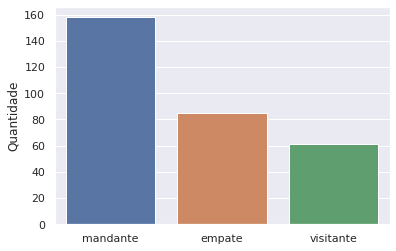

In [ ]:
result = ['mandante', 'empate','visitante']
sns.set_theme(style="darkgrid")
sns.barplot(x = result, y = [158, 85, 61])
plt.xlabel('')
plt.ylabel('Quantidade')
plt.show()

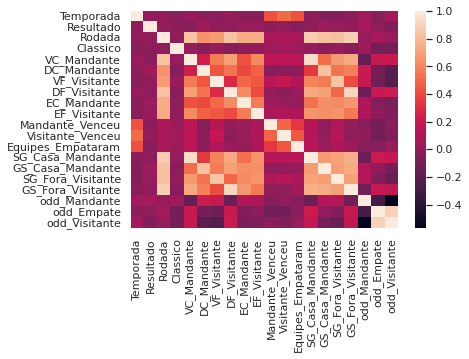

In [ ]:
corr = data.corr(method='pearson')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

A matriz de correlação nos mostra que infelizmente nenhuma das features tem uma correlação muito forte com o resultado, um problemão. Porém, já era de se esperar, pois, tratando-se de futebol, não temos um padrão, matemática ou algo certo para prever resultados. Sempre acontecem 'zebras' e empates inesperados. Empates esses, que tornam ainda mais difícil a predição do resultado

In [ ]:
corr['Resultado'].sort_values(ascending=False)

Resultado            1.000000
odd_Mandante         0.077400
DC_Mandante          0.046826
GS_Casa_Mandante     0.039627
EF_Visitante         0.031775
EC_Mandante          0.024192
SG_Fora_Visitante    0.017528
Visitante_Venceu     0.010771
Rodada               0.008425
VF_Visitante         0.003208
GS_Fora_Visitante    0.001861
Temporada            0.000914
DF_Visitante        -0.003488
SG_Casa_Mandante    -0.009118
odd_Empate          -0.009442
Classico            -0.024046
Mandante_Venceu     -0.024356
VC_Mandante         -0.025815
Equipes_Empataram   -0.034382
odd_Visitante       -0.050329
Name: Resultado, dtype: float64

# Aprendizado de Máquina

Para os modelos de Aprendizagem de Máquina, minha ideia é usar os principais algorítmos e ver qual tem maior acertividade (acurácia) na predição do resultado dos jogos e depois combinar os 3  melhores classificadores para uma decisão baseada em pluralidade (se a maioria dos algoritmos concorda com esse resultado, então, é esse resultado) e assim ver se a acurácia do modelo melhora ou não.

In [ ]:
# importando bibliotecas para aprendizado de máquina
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

In [ ]:
# carregando base de dados pre processada
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/dataset/jogos_BR.pkl', 'rb') as f:
  [X,Y] = pickle.load(f)

In [ ]:
X.columns

Index(['Temporada', 'Mandante', 'Visitante', 'Rodada', 'Classico',
       'Vitorias_Mandante', 'Vitorias_Visitante', 'Derrotas_Mandante',
       'Derrotas_Visitante', 'Empates_Mandante', 'Empates_Visitante',
       'VC_Mandante', 'DC_Mandante', 'VF_Visitante', 'DF_Visitante',
       'EC_Mandante', 'EF_Visitante', 'Pontos_Mandante', 'Pontos_Visitante',
       'Aprov_Mandante', 'Aprov_Visitante', 'Mandante_Venceu',
       'Visitante_Venceu', 'Equipes_Empataram', 'SG_Casa_Mandante',
       'GS_Casa_Mandante', 'SG_Fora_Visitante', 'GS_Fora_Visitante',
       'odd_Mandante', 'odd_Empate', 'odd_Visitante'],
      dtype='object')

In [ ]:
# excluindo dados categóricos
X = X.drop(['Mandante', 'Visitante', 'Temporada', 'Rodada'], axis=1)

In [ ]:
# normalizando a base de dados
scaler = StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)


O Scikit Learning nos oferta algo interessante, o GridSearch, com ele podemos verificar vários parâmetros treinando um modelo de e assim sabermos quais os melhores parâmetros do modelo para a base de dados, por meio da acurácia

### Random Forest

In [ ]:
# Escolhendo parâmetros para a checkagem do random forest
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [100],
              'min_samples_split': [2, 3, 5, 7, 9],
              'min_samples_leaf': [1, 3, 5, 7]
              }

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)

# verificação
grid_search.fit(X_scaled, Y)
melhores_param = grid_search.best_params_
melhor_result = grid_search.best_score_

# resultados
print(melhores_param)
print(melhor_result)


{'criterion': 'entropy', 'min_samples_leaf': 7, 'min_samples_split': 9, 'n_estimators': 100}
0.5240131578947369


## K-Nearest Neighbors

In [ ]:
parametros = {'n_neighbors': [3, 5, 7, 11, 15, 21, 25, 27, 31],
              'p': [1, 2],
              'weights': ['uniform', 'distance'],
              }

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_scaled, Y)
melhores_param = grid_search.best_params_
melhor_result = grid_search.best_score_

print(melhores_param)
print(melhor_result)

{'n_neighbors': 25, 'p': 1, 'weights': 'uniform'}
0.5032894736842105


## Logistic Regression

In [ ]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [0.1, 1 , 1.5, 2],
              'penalty': ['l1', 'l2', 'elasticnet']
              }

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_scaled, Y)
melhores_param = grid_search.best_params_
melhor_result = grid_search.best_score_

print(melhores_param)
print(melhor_result)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 0.1, 'penalty': 'l2', 'tol': 0.001}
0.5121710526315789


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the followi

## Support Vector Machine

In [ ]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [0.1, 1 , 1.5, 2],
              'kernel': ['rbf', 'poly', 'sigmoid'],
              }

grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_scaled, Y)
melhores_param = grid_search.best_params_
melhor_result = grid_search.best_score_

print(melhores_param)
print(melhor_result)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.5154605263157895


## Neural Network

In [ ]:
# (num_input + num_output)/hidden_layers
# (26 + 3) / 2

parametros = {'activation': ['logistic', 'relu', 'tanh'],
              'solver': ['adam','sgd'],
              'batch_size': [10, 50, 100]
              }

grid_search = GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=(15,15), max_iter=3000000000, tol=0.00001), param_grid=parametros)
grid_search.fit(X_scaled, Y)
melhores_param = grid_search.best_params_
melhor_result = grid_search.best_score_

print(melhores_param)
print(melhor_result)

{'activation': 'logistic', 'batch_size': 10, 'solver': 'sgd'}
0.5210526315789473


# Avaliando Algorítmos

Para a validação dos algoritmos, escolhi a validação cruzada k-fold com k = 10.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_naive = []
resultados_rf = []
resultados_knn = []
resultados_logistic = []
resultados_svm = []
resultados_mlp = []

for i in range(30):
  k = KFold(n_splits=10, shuffle=True, random_state=0)

  naive = GaussianNB()
  rf = RandomForestClassifier(criterion= 'entropy', min_samples_leaf= 7, min_samples_split= 9, n_estimators= 100)
  knn = KNeighborsClassifier(n_neighbors= 25, p= 1, weights='uniform')
  logistic_reg = LogisticRegression(C=0.1, solver='lbfgs', tol=0.001, penalty='l2')
  svm = SVC(C= 1.5, kernel='rbf', tol=0.001)
  mlp = MLPClassifier(activation='logistic', batch_size=10, solver='sgd', hidden_layer_sizes=(15,15), max_iter=30000000000, tol=0.00001)

  scores = cross_val_score(naive, X_scaled, Y, cv=k)
  resultados_naive.append(scores.mean())

  scores = cross_val_score(rf, X_scaled, Y, cv=k)
  resultados_rf.append(scores.mean())

  scores = cross_val_score(knn, X_scaled, Y, cv=k)
  resultados_knn.append(scores.mean())

  scores = cross_val_score(logistic_reg, X_scaled, Y, cv=k)
  resultados_logistic.append(scores.mean())

  scores = cross_val_score(svm, X_scaled, Y, cv=k)
  resultados_svm.append(scores.mean())

  scores = cross_val_score(mlp, X_scaled, Y, cv=k)
  resultados_mlp.append(scores.mean())


In [ ]:
resultados = pd.DataFrame({'naive_bayes':resultados_naive,
                           'random_forest':resultados_rf,
                           'knearest_neighbors':resultados_knn,
                           'logistic_regression':resultados_logistic,
                           'support_vector_machine':resultados_svm,
                           'rede_neural':resultados_mlp
                           })

resultados

,naive_bayes,random_forest,knearest_neighbors,logistic_regression,support_vector_machine,rede_neural
0,0.470395,0.513487,0.494079,0.514474,0.515132,0.518421
1,0.470395,0.504934,0.494079,0.514474,0.515132,0.518421
2,0.470395,0.509868,0.494079,0.514474,0.515132,0.518421
3,0.470395,0.507895,0.494079,0.514474,0.515132,0.518750
4,0.470395,0.511184,0.494079,0.514474,0.515132,0.518092
5,0.470395,0.513158,0.494079,0.514474,0.515132,0.521053
6,0.470395,0.509868,0.494079,0.514474,0.515132,0.517763
7,0.470395,0.505592,0.494079,0.514474,0.515132,0.520724
8,0.470395,0.510855,0.494079,0.514474,0.515132,0.518421
9,0.470395,0.510197,0.494079,0.514474,0.515132,0.519737


In [ ]:
resultados.describe()

,naive_bayes,random_forest,knearest_neighbors,logistic_regression,support_vector_machine,rede_neural
count,3.000000e+01,30.000000,3.000000e+01,3.000000e+01,3.000000e+01,30.000000
mean,4.703947e-01,0.509879,4.940789e-01,5.144737e-01,5.151316e-01,0.519287
std,2.823006e-16,0.002521,3.952209e-16,2.258405e-16,1.129203e-16,0.001631
min,4.703947e-01,0.504605,4.940789e-01,5.144737e-01,5.151316e-01,0.514803
25%,4.703947e-01,0.508141,4.940789e-01,5.144737e-01,5.151316e-01,0.518421
50%,4.703947e-01,0.510691,4.940789e-01,5.144737e-01,5.151316e-01,0.519572
75%,4.703947e-01,0.511760,4.940789e-01,5.144737e-01,5.151316e-01,0.520066
max,4.703947e-01,0.513487,4.940789e-01,5.144737e-01,5.151316e-01,0.523355


a tabela acima mostra a acurácia média da validação cruzada. Com isso obtemos que os melhores 5 classificadores foram:
- Rede Neural: 51,92%
- Support Vector Machine: 51,51%
- Logistic Regression: 51,44%
- Random Forest: 50,98%
- K-Nearest Neighbors: 49,40%

In [ ]:
# salvando classificadores de melhores resultados treinados
import pickle

pickle.dump(logistic_reg, open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/classificadores/logistic_class.sav', 'wb'))
pickle.dump(svm, open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/classificadores/svm_class.sav', 'wb'))
pickle.dump(mlp, open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/classificadores/mlp_class.sav', 'wb'))
pickle.dump(rf, open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/classificadores/rf_class.sav', 'wb'))
pickle.dump(knn, open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/classificadores/knn_class.sav', 'wb'))

### Decisão Conjunta dos Classificadores

In [ ]:
# Criando modelo de decisão conjunta
from sklearn.ensemble import VotingClassifier

# 3 melhores classificadores
models=[('logistic_regression', logistic_reg), ('support-vector-machine', svm), ('mlp', mlp)]

# voting = hard ----> classe votada pela maioria
modelo_conjunto = VotingClassifier(models, voting='hard')

In [ ]:
# avaliando modelo de decisão conjunta

resultados_modelo_conjunto = []

for i in range(30):
  k = KFold(n_splits=10, shuffle=True, random_state=0)

  scores = cross_val_score(modelo_conjunto, X_scaled, Y, cv=k)
  resultados_modelo_conjunto.append(scores.mean())

resultado = pd.DataFrame({'ensemble':resultados_modelo_conjunto})
resultado

,ensemble
0,0.522697
1,0.522368
2,0.523026
3,0.522368
4,0.523684
5,0.522368
6,0.520066
7,0.520724
8,0.520724
9,0.520066


In [ ]:
resultado.describe()

,ensemble
count,30.000000
mean,0.521393
std,0.001235
min,0.518750
25%,0.520724
50%,0.521053
75%,0.522615
max,0.523684


In [ ]:
pickle.dump(modelo_conjunto, open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/classificadores/ensemble_class.sav', 'wb'))

# Realizando previsões

In [ ]:
# carregando melhores classificadores treinados
import pickle

ensemble = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/classificadores/ensemble_class.sav', 'rb'))


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.15, random_state=42)

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

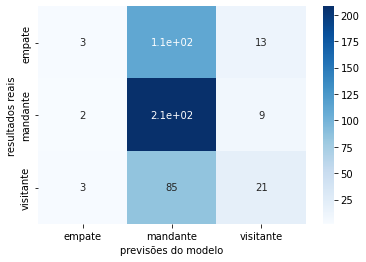

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', )
ax.xaxis.set_ticklabels(['empate','mandante', 'visitante'])
ax.yaxis.set_ticklabels(['empate','mandante', 'visitante'])
plt.xlabel('previsões do modelo')
plt.ylabel('resultados reais')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['empate', 'mandante', 'visitante']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      empate       0.38      0.02      0.04       128
    mandante       0.51      0.95      0.67       219
   visitante       0.49      0.19      0.28       109

    accuracy                           0.51       456
   macro avg       0.46      0.39      0.33       456
weighted avg       0.47      0.51      0.40       456

